# Jastrow Factor Derivatives

This notebook calculates the expressions for the derivatives of the following Jastrow function:

$$J(\mathbf{X}) = \prod_{i < j} \exp\left(\frac{\alpha r_{ij}}{1 + \beta r_{ij}}\right)$$

with $N$ particles in $D$ dimensions, $\mathbf{X}\in\mathbb{R}^{N\times D}$ and $r_{ij} = ||\mathbf{X_i} - \mathbf{X_j}||$.

In [1]:
%reload_ext blackcellmagic
from sympy import *
init_printing()

In [2]:
N, D, i, j, k, l, d = symbols("N D i j k l d", integer=True)
X = IndexedBase("X", shape=(N, D))


## Definition


In [45]:
class r(Function):
    @classmethod
    def eval(cls, i, j):
        if i.is_Number and j.is_Number:
            return sqrt(Sum((X[i, d] - X[j, d]) ** 2, (d, 1, D)))

    def doit(self, **kwargs):
        i, j = self.args
        return sqrt(Sum((X[i, d] - X[j, d]) ** 2, (d, 1, D)))

    def _eval_derivative(self, x):
        return self.doit()._eval_derivative(x)


def J(X):
    alpha, beta = symbols(r"\alpha \beta", real=True)
    exponent = Sum(alpha * r(i, j) / (1 + beta * r(i, j)), (i, 1, N - 1), (j, i + 1, N))
    return exp(exponent), (alpha, beta)


Jastrow, (alpha, beta) = J(X)
Jastrow


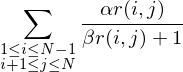

In [46]:
log_Jastrow = expand_log(log(Jastrow), force=True)
log_Jastrow


## Derivative w.r.t. $\beta$


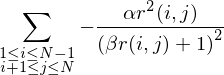

In [47]:
dlogJ_dBeta = diff(log_Jastrow, beta, 1)
dlogJ_dBeta


## Derivative w.r.t. $X_{kl}$


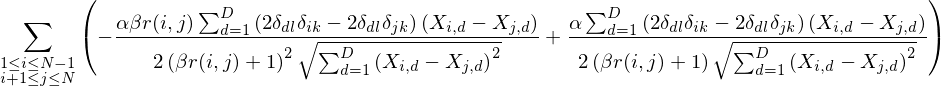

In [48]:
dlogJ_dXkl = diff(log_Jastrow, X[k, l], 1)
dlogJ_dXkl


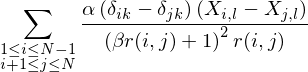

In [49]:
# Manually simplify the above:
dlogJ_dXkl = Sum(
    alpha
    * beta
    * (KroneckerDelta(k, i) - KroneckerDelta(k, j))
    * (X[i, l] - X[j, l])
    / (beta * r(i, j) + 1)
    / (beta * r(i, j) * (beta * r(i, j) + 1)),
    (i, 1, N - 1),
    (j, i + 1, N),
)
dlogJ_dXkl


## Second derivative w.r.t. $X_{kl}$


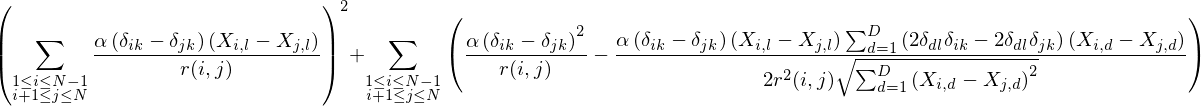

In [53]:
d2J_dXkl2 = dlogJ_dXkl ** 2 + diff(dlogJ_dXkl, X[k, l], 1)
d2J_dXkl2.subs(beta, 0)


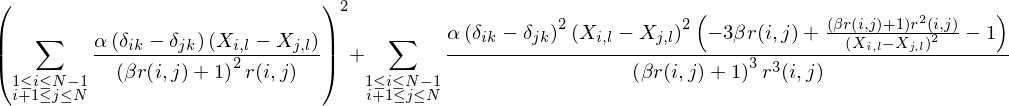

In [86]:
# Manually simplify the above:
d2J_dXkl2 = dlogJ_dXkl ** 2 + Sum(
    alpha
    * (KroneckerDelta(k, i) - KroneckerDelta(k, j)) ** 2
    * (X[i, l] - X[j, l]) ** 2
    / (beta * r(i, j) + 1) ** 3
    / r(i, j) ** 3
    * (
        (beta * r(i, j) + 1) * r(i, j) ** 2 / (X[i, l] - X[j, l]) ** 2
        - 3 * beta * r(i, j)
        - 1
    ),
    (i, 1, N - 1),
    (j, i + 1, N),
)
d2J_dXkl2
